<a href="https://colab.research.google.com/github/tanatiem/Finance-with-Python/blob/master/Mortgage%20Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mortgage Basics

A mortage is a loan that covers the remaining cost of a home after paying a
percentage of the home value as a down payment.



In [1]:
import numpy as np

# Set the value of the home you are looking to buy
home_value = 800000

# What percentage are you paying up-front?
down_payment_percent = 0.20

# Calculate the dollar value of the down payment
down_payment = home_value * down_payment_percent
print("Initial Down Payment: " + str(down_payment))

# Calculate the value of the mortgage loan required after the down payment
mortgage_loan = home_value - down_payment
print("Mortgage Loan: " + str(mortgage_loan))

Initial Down Payment: 160000.0
Mortgage Loan: 640000.0


## Converting from an Anual Rate

To convert from an annual rate to a periodic rate:
$$R_{Periodic} = (1 + R_{Annual})^{\frac{1}{N}} - 1$$

- R: Rate of Return (or Interest Rate)
- N: Number of Payment Periods Per Year

**Example:**

Convert a 12% annual interest rate to the equivalent monthly rate

$(1 + 0.12)^{\frac{1}{12}} - 1 = 0.949\%$ monthly rate

In [0]:
mortgage_rate = 0.0375

# Derive the equivalent monthly mortgage rate from the annual rate
mortgage_rate_periodic = (1 + mortgage_rate)**(1/12) - 1

##Calculating the Monthly Mortgage Payment

In order to calculate the monthly mortgage payment, you will use the numpy function .pmt(rate, nper, pv) where:

- rate = The periodic (monthly) interest rate
- nper = The number of payment periods (months) in the lifespan of the mortgage loan
- pv = The total value of the mortgage loan

You have been given a 30-year mortgage loan quote for your desired amount at 3.75%.

In [5]:
# How many monthly payment periods will there be over 30 years?
mortgage_payment_periods = 12*30

# Calculate the monthly mortgage payment (multiply by -1 to keep it positive)
periodic_mortgage_payment = -1*np.pmt(rate=mortgage_rate_periodic, 
                                      nper=mortgage_payment_periods, 
                                      pv=mortgage_loan)
print("Monthly Mortgage Payment: " + str(round(periodic_mortgage_payment, 2)))

Monthly Mortgage Payment: 2941.13


## Amortization, Interests and Principal

**Pricipal (Equity):** The amount of your mortgage paid that counts towards the value of the house itself

**Interest Payment**

$IP_{Periodic} = RMB * R_{Periodic}$

**Principal Payment**

$PP_{Periodic} = MP_{Periodic} - IP_{Periodic}$

- PP: Principal Payment
- MP: Mortgage Payment
- IP: Interest Payment
- R: Mortgage Interest Rate (Periodic)
- RMB: Remaining Mortgage Balance

In [6]:
# Calculate the amount of the first loan payment that will go towards interest
initial_interest_payment = mortgage_loan * mortgage_rate_periodic
print("Initial Interest Payment: " + str(round(initial_interest_payment, 2)))

# Calculate the amount of the first loan payment that will go towards principal
initial_principal_payment = periodic_mortgage_payment - initial_interest_payment
print("Initial Principal Payment: " + str(round(initial_principal_payment, 2)))

Initial Interest Payment: 1966.43
Initial Principal Payment: 974.7


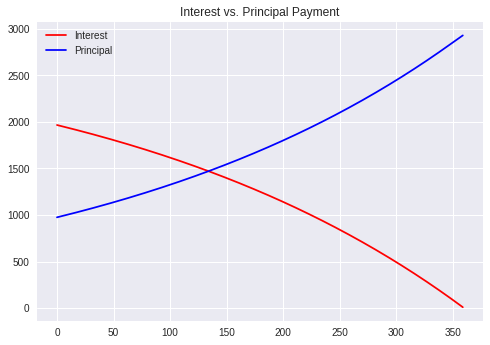

In [15]:
import matplotlib.pyplot as plt

interest_paid = np.zeros(mortgage_payment_periods)
principal_paid = np.zeros(mortgage_payment_periods)
principal_remaining = np.zeros(mortgage_payment_periods)

# Loop through each mortgage payment period
for i in range(0, mortgage_payment_periods):
    
    # Handle the case for the first iteration
    if i == 0:
        previous_principal_remaining = mortgage_loan
    else:
        previous_principal_remaining = principal_remaining[i-1]
        
    # Calculate the interest based on the previous principal
    interest_payment = round(previous_principal_remaining*mortgage_rate_periodic, 2)
    principal_payment = round(periodic_mortgage_payment - interest_payment, 2)
    
    # Catch the case where all principal is paid off in the final period
    if previous_principal_remaining - principal_payment < 0:
        principal_payment = previous_principal_remaining
        
    # Collect the historical values
    interest_paid[i] = interest_payment
    principal_paid[i] = principal_payment
    principal_remaining[i] = previous_principal_remaining - principal_payment
    
# Plot the interest vs principal
plt.plot(interest_paid, color="red", label='Interest')
plt.plot(principal_paid, color="blue", label='Principal')
plt.title('Interest vs. Principal Payment')
plt.legend()
plt.show()

##Home Ownership, Home Prices and Recessions

[0.20121838 0.2024405  0.20366638 0.20489603 0.20612945 0.20736666
 0.20860768 0.2098525  0.21110115 0.21235364 0.21360998 0.21487017
 0.21613424 0.21740219 0.21867404 0.21994979 0.22122946 0.22251308
 0.22380063 0.22509214 0.22638761 0.22768706 0.22899051 0.23029796
 0.23160944 0.23292494 0.23424448 0.23556808 0.23689574 0.23822748
 0.23956331 0.24090325 0.2422473  0.24359549 0.24494781 0.2463043
 0.24766495 0.24902979 0.25039881 0.25177205 0.2531495  0.25453119
 0.25591711 0.2573073  0.25870176 0.2601005  0.26150354 0.26291089
 0.26432256 0.26573857 0.26715894 0.26858366 0.27001276 0.27144626
 0.27288416 0.27432649 0.27577324 0.27722444 0.27868009 0.28014021
 0.28160483 0.28307394 0.28454756 0.28602571 0.28750841 0.28899566
 0.29048749 0.29198389 0.29348489 0.2949905  0.29650074 0.29801563
 0.29953516 0.30105936 0.30258825 0.30412184 0.30566014 0.30720316
 0.30875093 0.31030345 0.31186074 0.31342281 0.31498969 0.31656138
 0.3181379  0.31971926 0.32130549 0.32289659 0.32449258 0.32609

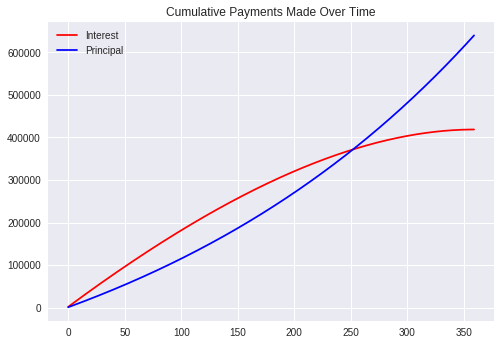

In [17]:
# Calculate the cumulative home equity (principal) over time
cumulative_home_equity = np.cumsum(principal_paid)

# Calculate the cumulative interest paid over time
cumulative_interest_paid = np.cumsum(interest_paid)

# Calculate your percentage home equity over time
cumulative_percent_owned = down_payment_percent + (cumulative_home_equity/home_value)
print(cumulative_percent_owned)

# Plot the cumulative interest paid vs equity accumulated
plt.plot(cumulative_interest_paid, color='red', label='Interest')
plt.plot(cumulative_home_equity, color='blue', label='Principal')
plt.title('Cumulative Payments Made Over Time')
plt.legend()
plt.show()

## Rising Housing Prices

Home values have been rising steadily each year, and this is a rather large investment for you.

Calculate your home equity value over time given a steady growth rate of 0.25% per month

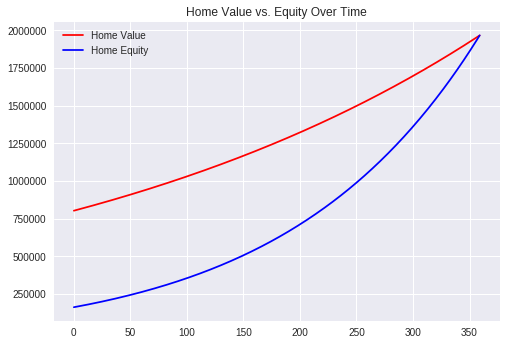

In [23]:
growth_array = np.repeat(0.0025, mortgage_payment_periods)

# Calculate the cumulative growth over time
cumulative_growth_forecast = np.cumprod(1 + growth_array)

# Forecast the home value over time
home_value_forecast = home_value * cumulative_growth_forecast

# Forecast the home equity value owned over time
cumulative_home_value_owned = home_value_forecast * cumulative_percent_owned

# Plot the home value vs equity accumulated
plt.plot(home_value_forecast, color='red', label='Home Value')
plt.plot(cumulative_home_value_owned, color='blue', label='Home Equity')
plt.title('Home Value vs. Equity Over Time')
plt.legend()
plt.show()

##Falling Housing Prices and Underwater Mortgages

Unfortunately, you are also well aware that home prices don't always rise.

An underwater mortgage is when the remaining amount you owe on your mortgage is actually higher than the value of the house itself.

In this exercise, you will calculate the worst case scenario where home prices drop steadily at the rate of 0.45% per month.

True     180
False    180
dtype: int64


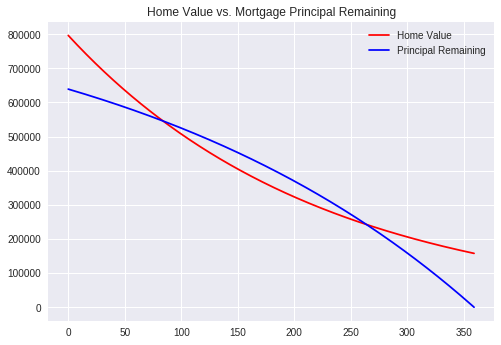

In [28]:
import pandas as pd

decline_array = np.repeat(-0.0045, mortgage_payment_periods)

# Cumulative drop in home value over time as a ratio
cumulative_decline_forecast = np.cumprod(1+decline_array)

# Forecast the home value over time
home_value_forecast = home_value * cumulative_decline_forecast

# Find all periods where your mortgage is underwater
underwater = principal_remaining > home_value_forecast
print(pd.value_counts(underwater))

# Plot the home value vs principal remaining
plt.plot(home_value_forecast, color='red', label='Home Value')
plt.plot(principal_remaining, color='blue', label='Principal Remaining')
plt.title('Home Value vs. Mortgage Principal Remaining')
plt.legend()
plt.show()